In [2]:
import numpy as np
class Node():
    """A search node class for Maze Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.c = 0  # cost from source to current node

    def __eq__(self, other):
        return self.position == other.position

    def __hash__(self):               #<-- added a hash method
        return hash(self.position)


def search_path(maze, start, end, method='DFS'):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.c = 0
    end_node = Node(None, end)
    end_node.c = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = set()                # <-- closed_list must be a set

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    expanded_nodes=0
    queue_size=0
    while len(open_list) > 0:
        # Get the current node
        current_node = open_list[0]
        current_index = 0

        # Pop current off open list, add to closed list
        # depending on how the nodes are added to the queue, this will implement either FIFO (BFS), or LIFO (DFS)
        open_list.pop(current_index)
        closed_list.add(current_node)     # <-- change append to add

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return(expanded_nodes,queue_size,path[::-1]) # Return reversed path

        # Generate children
        expanded_nodes=expanded_nodes+1
        if(len(open_list)>queue_size):
            queue_size=len(open_list)  # check maximum queue size
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            if child in closed_list:              # <-- remove inner loop so continue takes you to the end of the outer loop
                continue

            # Create the updated cost values
            # child.c = current_node.c + 1           # diagonal and horizontal/vertical cost same
            child.c = current_node.c + np.sqrt(np.square(child.position[0] - current_node.position[0])+np.square(child.position[1] - current_node.position[1]))

            # Child is already in the open list
            childAlreadyExist=False
            for open_node in open_list:
                if child == open_node and child.c > open_node.c:
                    childAlreadyExist=True
                    continue

            # Add the child to the open list
            if(not childAlreadyExist):
                if method=='BFS':
                    open_list.append(child)
                else:
                    open_list.insert(0,child)
                #print(child.position)

In [3]:
def pathLength(path):
    dis=0
    for i in range(len(path)-1):
        x1=path[i][0]
        y1=path[i][1]
        x2=path[i+1][0]
        y2=path[i+1][1]
        dis=dis+np.sqrt(np.square(x1-x2)+np.square(y1-y2))
    return(dis)

Question 8 Part a


DFS
Number of Nodes Expanded: 94
Path: [(0, 0), (0, 1)]
Fringe Size: 44
path length: 1.000000


BFS
Number of Nodes Expanded: 1
Path: [(0, 0), (0, 1)]
Fringe Size: 0
path length: 1.000000


Explanation: 
The DFS algorithm is LIFO, and it inserts children into the front of open_list if it is not already in it. 
It ends up visiting and expanding every node before it comes back to the node that was right next to it.
This is due to the order the adjacent squares are checked.
The BFS algorithm is optimal in this scenario because it is FIFO and skips the first adjacent square because
it is out of bounds. The next adjacent square in the list is the neighbor to the right and this child is appended
to the open_list and will be chosen first on the next iteration of the while loop.  Since it is the goal, it will be
returned as the path and stop searching.




Question 8 Part b




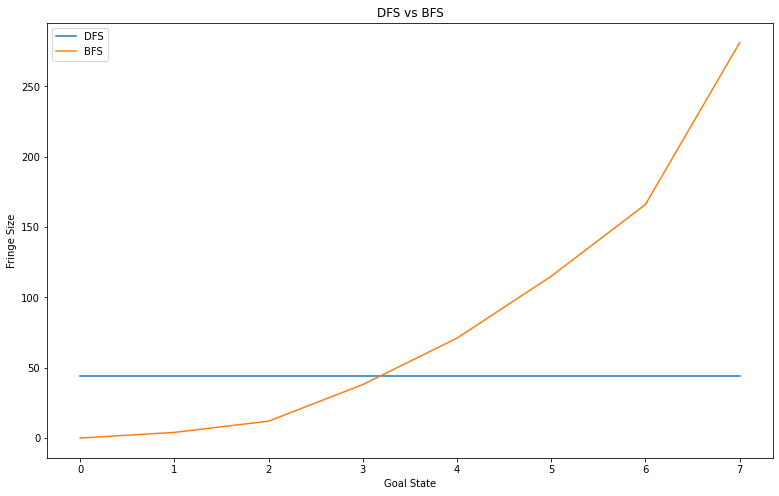

DFS Fringe Sizes: [44, 44, 44, 44, 44, 44, 44, 44]
BFS Fringe Sizes: [0, 4, 12, 38, 71, 115, 166, 281]


Explanation: 
The maximum fringe size does not grow larger in DFS than the first traversal throught the depth
because it finds the full depth immediately. It then narrows down the fringe as the algorithm
searches each branch of the tree.
The maximum fringe size grows exponentially with BFS because all the children of each node (and the children
of the children, etc.) must be saved as the algorithm goes across the breadth to come back and search the next level.




Question 8 Part c


DFS Path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (7, 9), (6, 9), (5, 8), (4, 9), (3, 8), (2, 9), (1, 8), (0, 9)]
BFS Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (0, 9)]


Explanation: 
BFS is optimal and DFS is not optimal in this scenario.
This is becasue BFS searches across the breadth and DFS will drill down deeper from the start.
T

In [4]:
import matplotlib.pyplot as plt

def main():

    # Define Maze 0 = open space, 1 = obstacles
    maze = [[0,0,0,0,1,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0]]

    # Q8 - a
    start = (0, 0)
    end = (0, 1)

    print('Question 8 Part a')
    print('\n')
    # DFS
    print('DFS')
    expanded_nodes,queue_size,path = search_path(maze, start, end,'DFS')
    print('Number of Nodes Expanded: ' + str(expanded_nodes))
    print('Path: ' + str(path))
    print('Fringe Size: ' + str(queue_size))
    print("path length: %f"%pathLength(path))
    print('\n')
    # BFS
    print('BFS')
    expanded_nodes,queue_size,path = search_path(maze, start, end,'BFS')
    print('Number of Nodes Expanded: ' + str(expanded_nodes))
    print('Path: ' + str(path))
    print('Fringe Size: ' + str(queue_size))
    print("path length: %f"%pathLength(path))
    print('\n')
    print('Explanation: ')
    print('The DFS algorithm is LIFO, and it inserts children into the front of open_list if it is not already in it. ')
    print('It ends up visiting and expanding every node before it comes back to the node that was right next to it.')
    print('This is due to the order the adjacent squares are checked.')
    print('The BFS algorithm is optimal in this scenario because it is FIFO and skips the first adjacent square because') 
    print('it is out of bounds. The next adjacent square in the list is the neighbor to the right and this child is appended')
    print('to the open_list and will be chosen first on the next iteration of the while loop.  Since it is the goal, it will be')
    print('returned as the path and stop searching.')
    print('\n')
    print('\n')


    # Q8 - b

    print('Question 8 Part b')
    print('\n')

    start = (0,0)
    xs = []
    DFSys = []
    BFSys = []
    #thisList = [(0,0), (0,1), (0, 2)]
    for i in range(1, 10):
      if i == 4:
        continue
      end = (0, i)
      xs.append(end)

      # DFS
      expanded_nodes,queue_size,path = search_path(maze, start, end,'DFS')
      DFSys.append(queue_size)

      # BFS
      expanded_nodes,queue_size,path = search_path(maze, start, end,'BFS')
      BFSys.append(queue_size)

    #xs2 = [1,2,3,4,5,6,7,8]

    fig, ax = plt.subplots()
    fig.set_figwidth(13)
    fig.set_figheight(8)
    ax.plot(DFSys, label="DFS")
    ax.plot(BFSys, label="BFS")
    ax.set(xlabel='Goal State', ylabel='Fringe Size', title='DFS vs BFS')
    ax.legend()
    plt.show()

    print('DFS Fringe Sizes: ' + str(DFSys))
    print('BFS Fringe Sizes: ' + str(BFSys))
    print('\n')
    print('Explanation: ')
    print('The maximum fringe size does not grow larger in DFS than the first traversal throught the depth')
    print('because it finds the full depth immediately. It then narrows down the fringe as the algorithm')
    print('searches each branch of the tree.')
    print('The maximum fringe size grows exponentially with BFS because all the children of each node (and the children')
    print('of the children, etc.) must be saved as the algorithm goes across the breadth to come back and search the next level.')
    print('\n')
    print('\n')

    # Q8 - c
    print('Question 8 Part c')
    print('\n')
    start = (0,0)
    end = (0,9)
    expanded_nodes,queue_size,path = search_path(maze, start, end,'DFS')
    print('DFS Path: ' + str(path))
    expanded_nodes,queue_size,path = search_path(maze, start, end,'BFS')
    print('BFS Path: ' + str(path))
    print('\n')

    print('Explanation: ')
    print('BFS is optimal and DFS is not optimal in this scenario.')
    print('This is becasue BFS searches across the breadth and DFS will drill down deeper from the start.')
    print('This will cause BFS to locate the goal state faster as it is directly across from the initial state. (Same Row)')
    print('The fringe size is larger for the BFS because the repetitive nature of saving the children of children, etc., but it returns a more optimal path')

main()
#print(main())

# DFS inserts to front of list at the end of successor function and pulls from front each iteration.
# BFS appends to end and then pulls from the front each iterations
# It will not insert into open list if it is already in open list.
# The same node can be expanded more than once
# The same node at a position can be added to the open list if it has already been popped before.

In [5]:
import numpy as np
class Node2():
    """A search node class for Maze Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.c = 0  # cost from source to current node

    def __eq__(self, other):
        return self.position == other.position

    def __hash__(self):               #<-- added a hash method
        return hash(self.position)

In [6]:
# My implementation
def successorFunction(maze, aNode):

  successors = []
  possiblePositions = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]

  for position in possiblePositions:

    # Get node position
    node_position = (aNode.position[0] + position[0], aNode.position[1] + position[1])

    # Make sure within range
    if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
      continue

    # Make sure walkable terrain
    if maze[node_position[0]][node_position[1]] != 0:
      continue
      
    newNode = Node2(aNode, node_position)
    successors.append(newNode)

  return successors

In [7]:
import matplotlib.pyplot as plt
# This function will take a list of xs and ys and plot them to see behavior of search
def createGraph(wCounterList, FringeLengthList):
  fig, ax = plt.subplots()
  fig.set_figwidth(13)
  fig.set_figheight(8)
  ax.plot(wCounterList, FringeLengthList, label="DFS")
  ax.set(xlabel='While Loop Iteration', ylabel='Fringe Size', title='DFS')
  ax.legend()
  plt.show()

starting fringe: [<__main__.Node2 object at 0x7ff002c79050>]
[3]
[3, 10]
[3, 10, 17]
[3, 10, 17, 22]
[3, 10, 17, 22, 28]
[3, 10, 17, 22, 28, 34]
[3, 10, 17, 22, 28, 34, 41]
[3, 10, 17, 22, 28, 34, 41, 48]
[3, 10, 17, 22, 28, 34, 41, 48, 55]
GOAL NODE FOUND
(9, 9)


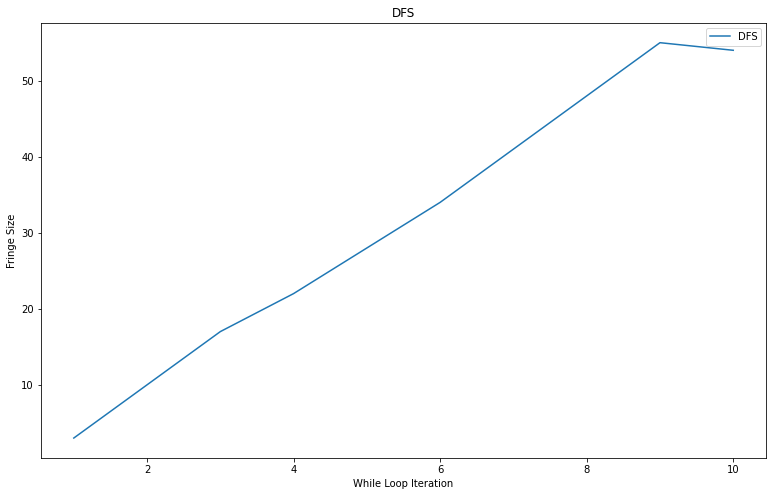

In [8]:
# Main function
def main():
  # Initialize Nodes
  startNode = Node2(None, (0,0))
  goalNode = Node2(None, (9,9))

  maze = [[0,0,0,0,1,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,1,0,0,0,0,0],
          [0,0,0,0,1,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,1,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,1,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0]]
  # Create an empty list for fringe
  fringe = []
  fringe.append(startNode)
  print('starting fringe: ' + str(fringe))
  # This variable will store the number of loops at each iteration (for graphing)
  wCounterList = []
  wCounter = 0
  # This variable will store the number of items in the fringe at each iteration (for graphing)
  FringeLengthList = []

  while(len(fringe) >= 1):
    # Increment the while Loop counter at each iteration
    wCounter += 1
    wCounterList.append(wCounter) # Save the while loop counter at each iteration
    
    currentNode = fringe.pop() # Remove a node from 

    if (currentNode.position == goalNode.position):
      print('GOAL NODE FOUND')
      print(currentNode.position)
      FringeLengthList.append(len(fringe))
      break

    successors = successorFunction(maze, currentNode)

    for successor in successors:
      fringe.append(successor)
    FringeLengthList.append(len(fringe))

    print(FringeLengthList)

    if (wCounter == 500):
      print('Solution will not be found....')
      break

  createGraph(wCounterList, FringeLengthList)


main()

# Yes this implementation will find the goal node.  This is because of my placement of the order of my
# checking of adjacent squares and the coordinates I'm searching for. The main disadvantage is that this implementation 
# doesn't check to see if a successor has been previously visited. This can add a lot of duplicates 
# to the fringe.